# Logistic Regression Implementation - Utkarsh Gaikwad

In [1]:
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()

In [3]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = dataset.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['target'].unique()

array([0, 1, 2])

In [10]:
df_copy = df[df.target!=2]
df_copy = df_copy.reset_index(drop=True)
df_copy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df_copy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df_copy['target'].unique()

array([0, 1])

## Seperating X and Y

In [13]:
X = df_copy.drop(labels=['target'],axis=1)
Y = df_copy[['target']]

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=42)

In [15]:
xtrain.shape, ytrain.shape

((80, 4), (80, 1))

In [16]:
xtest.shape, ytest.shape

((20, 4), (20, 1))

# Scaling the data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [18]:
xtrain.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.349899,-0.588143,1.135556,0.897445
1,0.196097,-0.160403,0.852110,0.897445
2,-0.726713,0.695078,-0.919428,-0.734273
3,-1.649524,0.267338,-1.132013,-1.096877
4,0.196097,-1.229753,0.710387,0.534841


In [19]:
xtest.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.811304,-0.802013,1.560725,1.441351
1,0.042295,-1.657493,0.781248,0.897445
2,0.657503,0.267338,1.348141,1.803955
3,-1.034317,-0.160403,-1.061151,-0.915575
4,-0.572912,1.550558,-0.706844,-0.734273


## Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,random_state=55)
clf.fit(xtrain, ytrain.values.flatten())

LogisticRegression(max_iter=1000, random_state=55)

# predict Values

In [21]:
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

# Confusion Matrix

<AxesSubplot: >

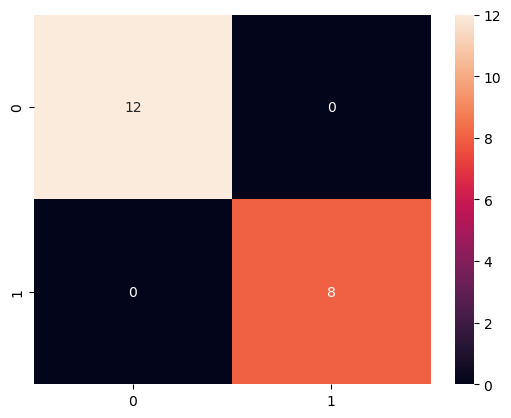

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest, ytest_pred)
sns.heatmap(cf,annot=True)

In [23]:
from sklearn.metrics import classification_report
cr = classification_report(ytest, ytest_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Cross Validation

In [24]:
from sklearn.model_selection import KFold

In [25]:
cv = KFold(n_splits=5, shuffle=True, random_state=56)

In [26]:
cv

KFold(n_splits=5, random_state=56, shuffle=True)

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,xtrain,ytrain.values.flatten(),scoring='accuracy',cv=cv)

In [28]:
np.mean(scores)

1.0

## Example 2

In [29]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=5,
                           n_classes=2,
                           random_state=87)

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=23)

In [31]:
xtrain.shape, ytrain.shape

((800, 10), (800,))

In [32]:
xtest.shape, ytest.shape

((200, 10), (200,))

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
clf.fit(xtrain,ytrain)

LogisticRegression(max_iter=200)

In [34]:
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

In [35]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain, ytrain_pred)
ts_acc = accuracy_score(ytest, ytest_pred)
print(f'Training Accuracy is : {tr_acc:.4f}')
print(f'Testing Accuracy is  : {ts_acc:.4f}')

Training Accuracy is : 0.7450
Testing Accuracy is  : 0.7250


<AxesSubplot: >

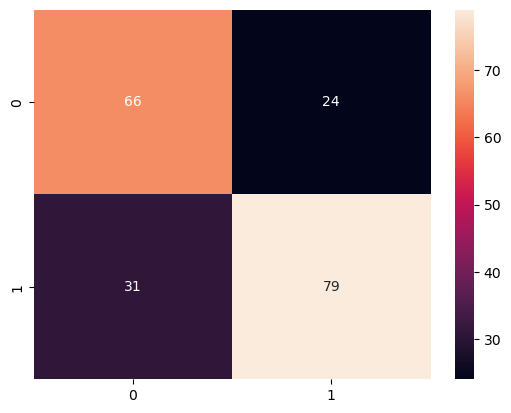

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest, ytest_pred)
sns.heatmap(cf, annot=True)

In [37]:
from sklearn.metrics import classification_report
cr = classification_report(ytest, ytest_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.73      0.71        90
           1       0.77      0.72      0.74       110

    accuracy                           0.73       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.73      0.72      0.73       200



In [38]:
# Cross Val
from sklearn.model_selection import KFold
folds = KFold(n_splits=5, shuffle=True, random_state=42)

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, xtrain, ytrain, scoring='accuracy',cv=folds)
scores

array([0.70625, 0.73125, 0.75625, 0.75625, 0.75   ])

In [40]:
mean_acc= np.mean(scores)
mean_acc

0.74

In [41]:
std_acc = np.std(scores,ddof=1)
std_acc

0.021469455046647063

In [42]:
std_acc/mean_acc

0.0290127770900636